importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

reading the csv file into dataframe

In [2]:
titanic_data = pd.read_csv('E:/Projects ML/technohacks data analysis/Task1 & Task2 Titanic/titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploring the data

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

correlation

C:\Users\alaa erfan\AppData\Local\Temp\ipykernel_22096\1333757102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap="YlGnBu")


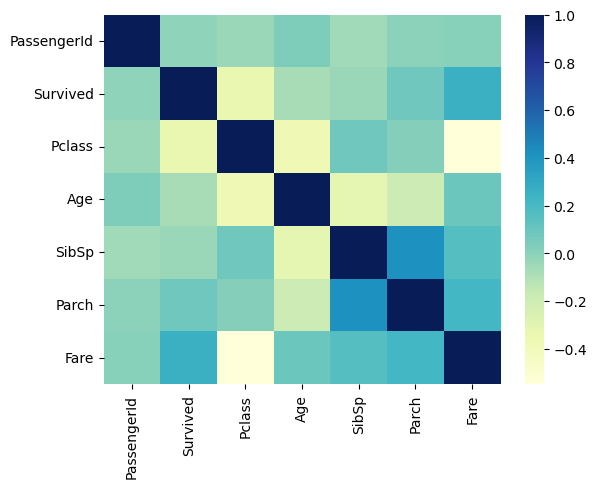

In [7]:
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show();

Data Exploratary

In [8]:
numerical_data = titanic_data[['Parch','Fare','Age','SibSp']]
categorical_data = titanic_data[['Survived','Pclass','Sex', 'Ticket', 'Cabin','Embarked']]

Viusalizing the data distrubition using histgram numerical data

In [9]:
import plotly.express as px

for i in numerical_data.columns:
    fig = px.histogram(numerical_data, x=i, title=i)
    fig.show()

Pivot_table 
compare Surival rate across Numerical data

In [10]:
pd.pivot_table(titanic_data,index='Survived',values=numerical_data)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Viusalizing the data distrubition using histgram Categorical data:

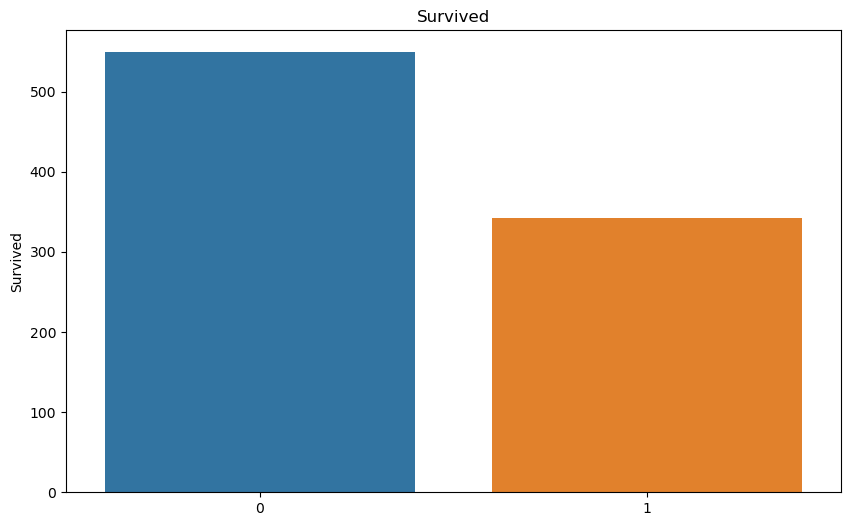

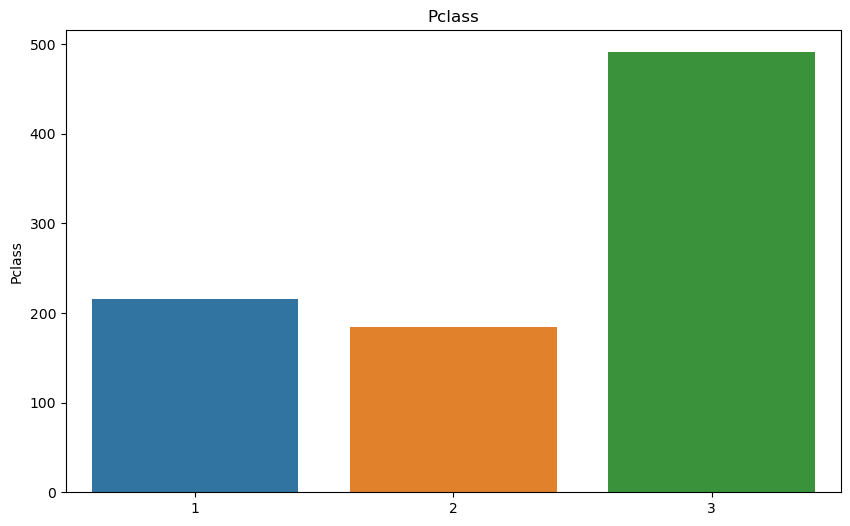

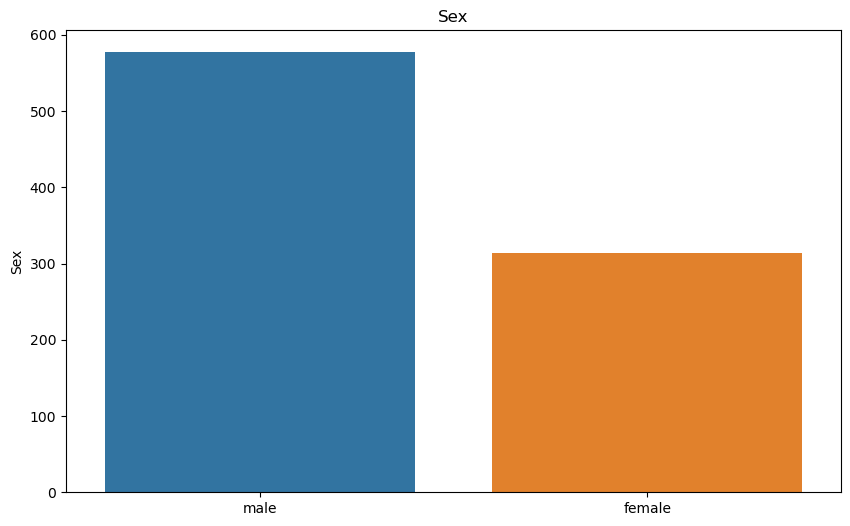

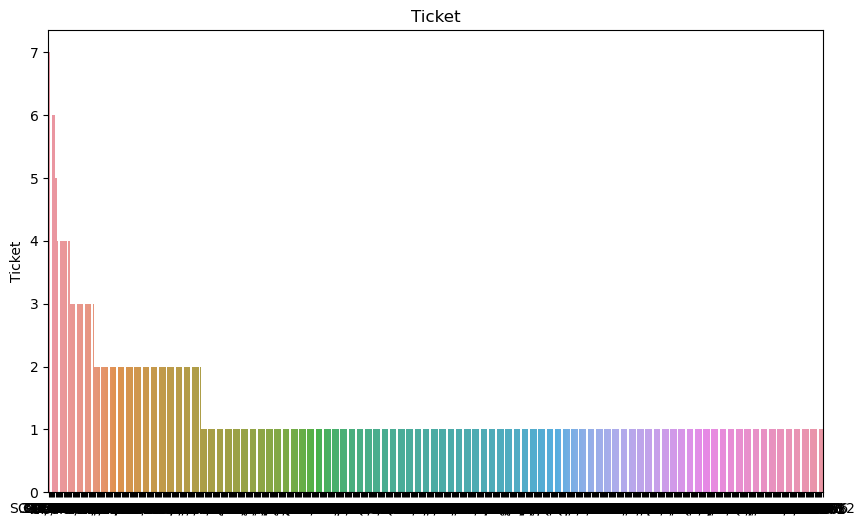

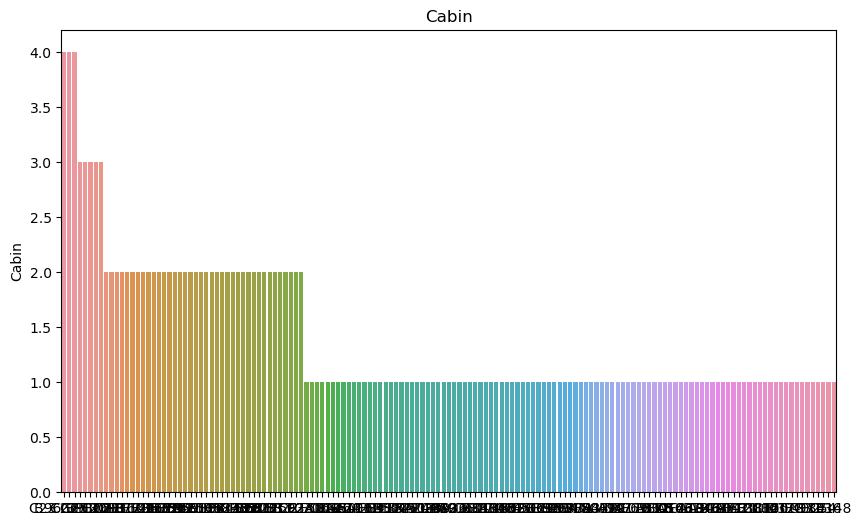

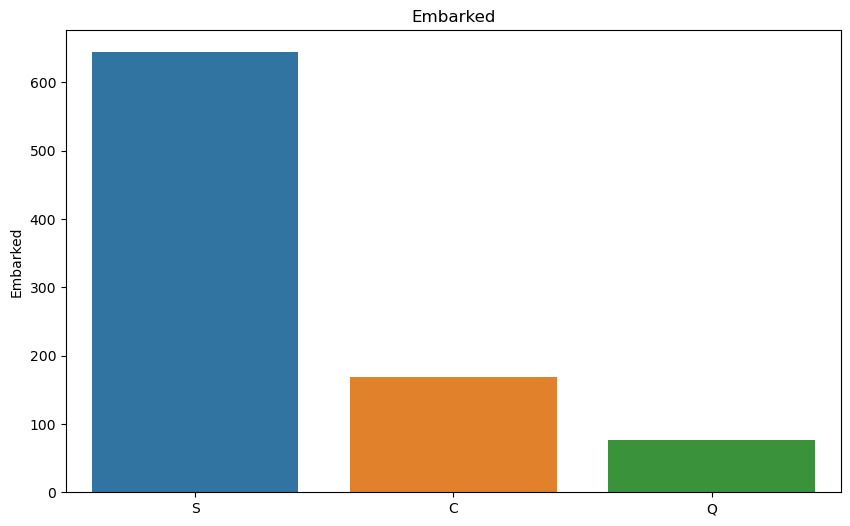

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in categorical_data.columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.barplot(x=categorical_data[i].value_counts().index, y=categorical_data[i].value_counts())
    plt.title(i)
    plt.show()

Viualizing the relation between Survival our target feature and other features

In [12]:
fig = px.histogram(titanic_data, x='Age', title='Age Distribution', nbins=20)
fig.show()

In [13]:
fig = px.histogram(titanic_data, x='Pclass', color='Survived', barmode='group',
                   title='Survival by Pclass')
fig.show()

In [14]:
fig = px.histogram(titanic_data, x='Sex', color='Survived', barmode='group',
                   title='Survival by Sex')
fig.show()

Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [15]:
fig = px.histogram(titanic_data, x='Embarked', color='Survived', barmode='group',
                   title='Survival by Embarked')
fig.show()

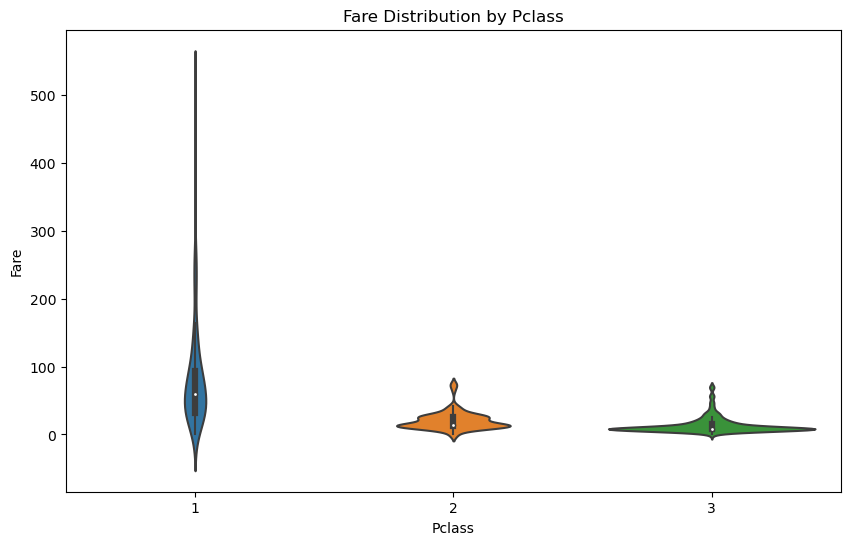

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Pclass')
plt.show()

In [17]:
numerical_data.corr()

,Parch,Fare,Age,SibSp
Parch,1.000000,0.216225,-0.189119,0.414838
Fare,0.216225,1.000000,0.096067,0.159651
Age,-0.189119,0.096067,1.000000,-0.308247
SibSp,0.414838,0.159651,-0.308247,1.000000


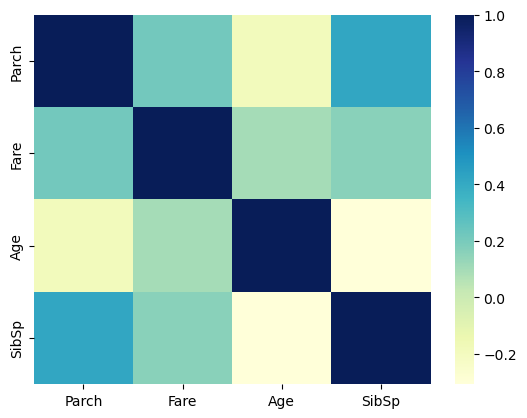

In [18]:
sns.heatmap(numerical_data.corr(),cmap="YlGnBu")
plt.show();

Feature Engineering

Outliers

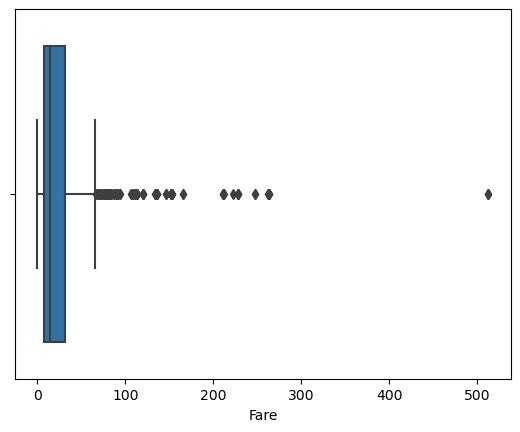

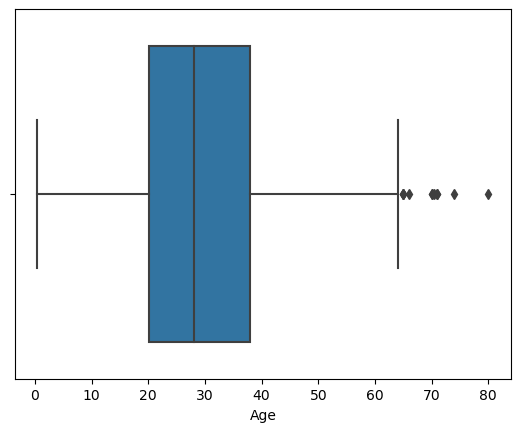

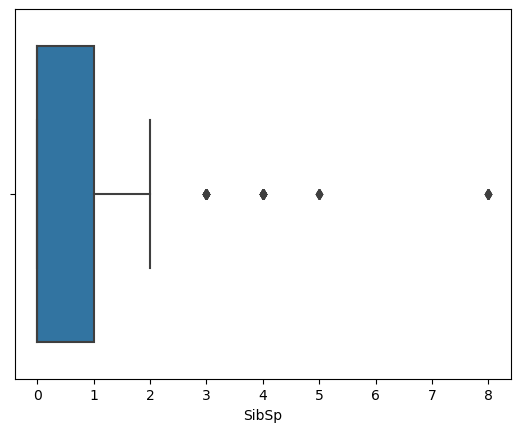

In [19]:
data = titanic_data[['Fare','Age','SibSp']]
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.show()

Data spliting

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived','Pclass','Sex']]):
    train_set=titanic_data.loc[train_indices]
    test_set=titanic_data.loc[test_indices]

making sure that the dataset is split correctly

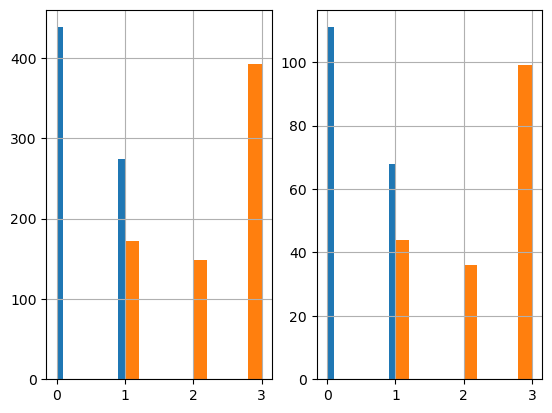

In [21]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()
plt.show()


Data Cleaning

Dealing with null values

In [22]:
missing_values_count = train_set.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(train_set.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

8.05243445692884


In [23]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         1
dtype: int64

Data Preprocessing

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [25]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=['C',"S",'Q','N']

        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names=['Female','Male']
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]         
        return X

In [26]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'],axis=1,errors='ignore')


creating our pipeline

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ('featureencoder',FeatureEncoder()),
                    ("featuredropper",FeatureDropper())
                    ])

In [28]:
train_set = pipeline.fit_transform(train_set)

In [29]:
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
400,401,1,3,39.0,0,0,7.925,0.0,0.0,1.0,0.0,1.0
56,57,1,2,21.0,0,0,10.500,0.0,0.0,1.0,1.0,0.0
575,576,0,3,19.0,0,0,14.500,0.0,0.0,1.0,0.0,1.0
113,114,0,3,20.0,1,0,9.825,0.0,0.0,1.0,1.0,0.0
331,332,0,1,45.5,0,0,28.500,0.0,0.0,1.0,0.0,1.0


In [30]:
train_set.shape

(712, 12)

Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
X=train_set.drop(['Survived'],axis=1)
y= train_set['Survived']
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data= y.to_numpy()

Model selection and fitting

RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {
        'n_estimators':[10,100,200,500],
        'max_depth': [None,5,10],
        'min_samples_split':[2,3,4]
    }
]
grid_search= GridSearchCV(clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [34]:
final_clf= grid_search.best_estimator_

In [35]:
final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [36]:
test_set = pipeline.fit_transform(test_set)

In [37]:
test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
555,556,0,1,62.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
759,760,1,1,33.000000,0,0,86.5000,0.0,0.0,1.0,1.0,0.0
697,698,1,3,28.724155,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
81,82,1,3,29.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
55,56,1,1,28.724155,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,1,1,30.000000,0,0,56.9292,1.0,0.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
114,115,0,3,17.000000,0,0,14.4583,1.0,0.0,0.0,1.0,0.0
740,741,1,1,28.724155,0,0,30.0000,0.0,0.0,1.0,0.0,1.0


In [38]:
X_test=test_set.drop(['Survived'],axis=1)
y_test= test_set['Survived']
scaler =StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [39]:
final_clf.score(X_data_test,y_data_test) * 100

79.88826815642457

training the model by the whole data

In [40]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [41]:
X_final= final_data.drop(['Survived'],axis=1)
y_final= final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final =y_final.to_numpy()


In [42]:
final_clf_ = RandomForestClassifier()
param_grid = [
    {
        'n_estimators':[10,100,200,500],
        'max_depth': [None,5,10],
        'min_samples_split':[2,3,4]
    }
]
grid_search= GridSearchCV(final_clf_,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [43]:
final_clf2= grid_search.best_estimator_

In [44]:
final_clf2

RandomForestClassifier(max_depth=5)

In [45]:
titanic_test_data = pd.read_csv('E:/Projects ML/technohacks data analysis/Task1 & Task2 Titanic/titanic/test.csv')
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
final_test = pipeline.fit_transform(titanic_test_data)

In [47]:
final_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [48]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [49]:
df_test = final_test
df_test=final_test.fillna(method='ffill')
scaler = StandardScaler()
final=scaler.fit_transform(df_test)


In [50]:
predictions = final_clf2.predict(final)

In [51]:
final_csv= pd.DataFrame(titanic_test_data['PassengerId'])
final_csv['Survived'] = predictions
final_csv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
final_csv.to_csv('E:/Projects ML/technohacks data analysis/Task1 & Task2 Titanic/titanic/predications.csv',index=False)

Applying Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
df = pipeline.fit_transform(titanic_data)

In [55]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [56]:
X_train=df.drop(['Survived'],axis=1)
y_train=df['Survived']

In [57]:
X_data=scaler.fit_transform(X_train)

In [58]:
model.fit(X_data,y_train)

LogisticRegression()

In [59]:
y_test_pred = model.predict(final)
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
print('LogisticRegression Training Accuracy: ', round(model.score(X_data, y_train), 2))

LogisticRegression Training Accuracy:  0.8


In [61]:
final_csv2= pd.DataFrame(titanic_test_data['PassengerId'])
final_csv2['Survived'] = y_test_pred
final_csv2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [62]:
final_csv2.to_csv('E:/Projects ML/technohacks data analysis/Task1 & Task2 Titanic/titanic/predications2.csv',index=False)

Applying SVM Model

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [65]:
svm_model = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_data,y_train)

SVC(kernel='linear')

In [67]:
print(final.dtype)
print(y_pred.dtype)

float64
int64


In [68]:
final_binary = (final > 0.5).astype(int)

In [74]:
y_pred = svm_model.predict(final_binary)

In [78]:
accuracy =svm_model.score(final_binary,y_pred)
accuracy

1.0